# Define function

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
%matplotlib inline
from scipy import sparse
from scipy.sparse.linalg import spsolve
def baseline_als(y, lam=10000, p=0.0001, niter=10):
    L = len(y)
    D = sparse.diags([1,-2,1],[0,-1,-2], shape=(L,L-2))
    D = lam * D.dot(D.transpose()) # Precompute this term since it does not depend on `w`
    w = np.ones(L)
    W = sparse.spdiags(w, 0, L, L)
    for i in range(niter):
        W.setdiag(w) # Do not create a new matrix, just update diagonal values
        Z = W + D
        z = spsolve(Z, w*y)
        w = p * (y > z) + (1-p) * (y < z)
    return z

# read data and image

In [ ]:
sample_num=5
samples={5:['./map/wet s5/','animal 5_-87_96_752_-54_62_480','animal 5']}
folder=samples[sample_num][0]
imagefile=samples[sample_num][1]
spectrafile=samples[sample_num][2]
large_spectra=0


# Normalize

In [4]:
df=pd.read_csv(folder+spectrafile+'.csv')
spectra=df.iloc[:,2:].to_numpy()
wl=df.columns.values[2:].astype('float64')

In [ ]:
x_start=int(min(df["X"]))
x_end=int(max(df["X"]))
x_num=int(len(df["X"].unique()))
y_start=int(min(df["Y"]))
y_end=int(max(df["Y"]))
y_num=int(len(df["Y"].unique()))
imgaxis=[x_start,x_end,y_end,y_start]
print(x_num,y_num)

80 100


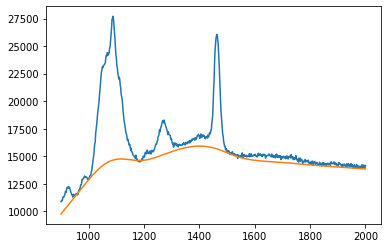

In [6]:
plt.figure()
plt.plot(wl,spectra[2000,:])
plt.plot(wl,baseline_als(spectra[2000,:],lam=10000, p=0.001))
plt.show()

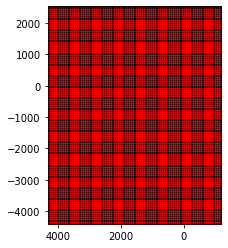

In [7]:
img=Image.open(folder+imagefile+'.png')
plt.figure()
heat=plt.scatter(df["X"],df["Y"], c='r',
                 s=1)
micimg=plt.imshow(img,extent=imgaxis)
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.show()

In [ ]:
for i in range(np.shape(spectra)[0]):
    spectra[i,:]=spectra[i,:]-baseline_als(spectra[i,:],lam=10000, p=0.001)

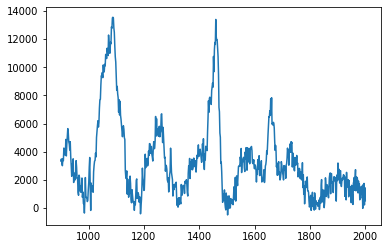

In [9]:
plt.figure()
plt.plot(wl,spectra[2100,:])
plt.show()

1659.8809


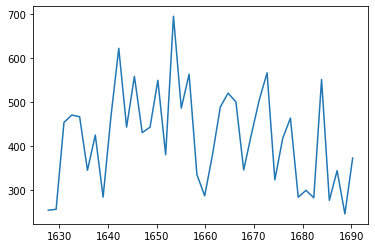

In [ ]:
if not large_spectra:
    normalize_peak=450 #1660cm-1
    
wlrange=20
print(wl[normalize_peak])
plt.plot(wl[normalize_peak-wlrange:normalize_peak+wlrange],
         spectra[5,normalize_peak-wlrange:normalize_peak+wlrange])

1093.1602


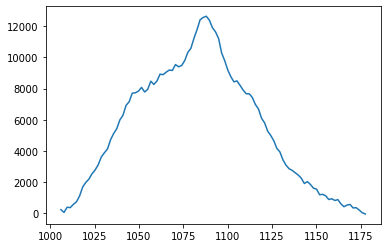

In [11]:
second_peak=110 #1093cm-1
wlrange=50
print(wl[second_peak])
plt.plot(wl[second_peak-wlrange:second_peak+wlrange],
         spectra[5,second_peak-wlrange:second_peak+wlrange])

# remove outlier

[0.87630272 0.03509382 0.01239088]


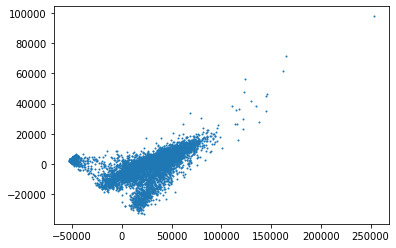

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pc=pca.fit_transform(spectra)
print(pca.explained_variance_ratio_)
plt.scatter(pc[:,0], pc[:,1],s=1)
#plt.xlim([-8000, 5000])

In [13]:
if sample_num==0:
    pca1threshold=300000
    pca2threshold=60000
elif sample_num==1:
    pca1threshold=30000
    pca2threshold=30000
elif sample_num==2:
    pca1threshold=300000
    pca2threshold=60000
elif sample_num==3:
    pca1threshold=38000
    pca2threshold=60000
elif sample_num==4:
    pca1threshold=50000
    pca2threshold=60000
elif sample_num==5:
    pca1threshold=100000
    pca2threshold=40000
elif sample_num==6:
    pca1threshold=160000
    pca2threshold=50000
print(len(pc))
sum(((pc[:,0]>pca1threshold) | (pc[:,0]<-pca1threshold))|
 ((pc[:,1]>pca2threshold)| (pc[:,1]<-pca2threshold)))

8000


20

In [ ]:
# discard outliers
spectra[((pc[:,0]>pca1threshold) | (pc[:,0]<-pca1threshold))|
 ((pc[:,1]>pca2threshold)| (pc[:,1]<-pca2threshold))]=1

# guess

In [15]:
guess_peak=450
print(wl[guess_peak])
z=np.max(spectra[:,guess_peak-20:guess_peak+20],axis=1)

1659.8809


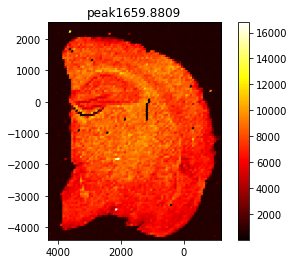

In [17]:
plt.figure()
heat=plt.scatter(df["X"],df["Y"], c=z,
                 s=5, cmap='hot')
micimg=plt.imshow(img,extent=imgaxis)
plt.colorbar(heat)
plt.title('peak'+str(wl[guess_peak]))
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.show()
data = pd.DataFrame({'X': df["X"], 'Y': df["Y"], 'Z': z})

In [ ]:
normalize_peaks=(np.max(spectra[:,normalize_peak-20:normalize_peak+20],axis=1).reshape((spectra.shape[0],1))+0.0000001)
second_peaks=(np.max(spectra[:,second_peak-50:second_peak+50],axis=1).reshape((spectra.shape[0],1))+0.0000001)
brain_peaks=(np.max(spectra[:,450-20:450+20],axis=1).reshape((spectra.shape[0],1))+0.0000001)
spectra=spectra/normalize_peaks


In [19]:
if sample_num in [0,5,6]:
    spectra[(brain_peaks<2000).reshape((spectra.shape[0]))]=0 #s0 s3 s5 s6
elif sample_num in [1]:
    spectra[(brain_peaks<800).reshape((spectra.shape[0]))]=0   #s1
elif sample_num in [2]:
    spectra[(brain_peaks<1300).reshape((spectra.shape[0]))]=0 #s2
elif sample_num in [3]:
    spectra[(brain_peaks<1100).reshape((spectra.shape[0]))]=0   #s3
elif sample_num in [4]:
    spectra[(brain_peaks<1500).reshape((spectra.shape[0]))]=0

In [20]:
guess_peak=326
print(wl[guess_peak])
z=np.max(spectra[:,guess_peak-20:guess_peak+20],axis=1)

1458.1777


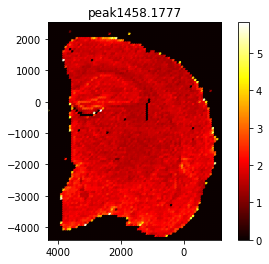

In [22]:
plt.figure()
heat=plt.scatter(df["X"],df["Y"], c=z,
                 s=5, cmap='hot')
micimg=plt.imshow(img,extent=imgaxis)
plt.colorbar(heat)
plt.title('peak'+str(wl[guess_peak]))
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.show()
data = pd.DataFrame({'X': df["X"], 'Y': df["Y"], 'Z': z})

In [23]:
guess_peak=59
print(wl[guess_peak])
z=np.max(spectra[:,guess_peak-2:guess_peak+2],axis=1)

1004.3047


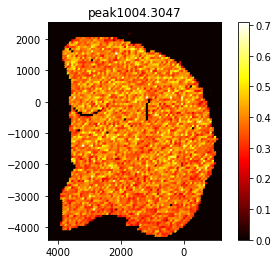

In [25]:
plt.figure()
heat=plt.scatter(df["X"],df["Y"], c=z,
                 s=5, cmap='hot')
micimg=plt.imshow(img,extent=imgaxis)
plt.colorbar(heat)
plt.title('peak'+str(wl[guess_peak]))
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.show()
data = pd.DataFrame({'X': df["X"], 'Y': df["Y"], 'Z': z})

In [26]:
guess_peak=238
print(wl[guess_peak])
z=np.max(spectra[:,guess_peak-2:guess_peak+2],axis=1)

1311.6211


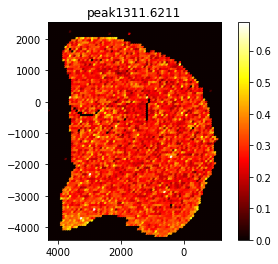

In [28]:
plt.figure()
heat=plt.scatter(df["X"],df["Y"], c=z,
                 s=5, cmap='hot')
micimg=plt.imshow(img,extent=imgaxis)
plt.colorbar(heat)
plt.title('peak'+str(wl[guess_peak]))
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.show()
data = pd.DataFrame({'X': df["X"], 'Y': df["Y"], 'Z': z})

# plot with component crosscoefficient

## 18 molecules

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.signal import savgol_filter
def my_corrcoef(matrix_1,matrix_2):
    similarity = cosine_similarity([matrix_1], [matrix_2])[0][0]
    return similarity

In [32]:
spectra_peakextracted=spectra.copy()
for i in range(spectra_peakextracted.shape[0]):
    spectra_peakextracted[i]=savgol_filter(spectra_peakextracted[i]-baseline_als(spectra_peakextracted[i], lam=100, p=0.0001, niter=10),11,3)
    spectra_peakextracted[i][spectra_peakextracted[i]<np.percentile(spectra_peakextracted[i],30)]=0


In [ ]:
component_excel=pd.read_excel('map/components.xlsx')
component_spectra=component_excel.iloc[:,1:].to_numpy()
component_name=component_excel.iloc[:,0]

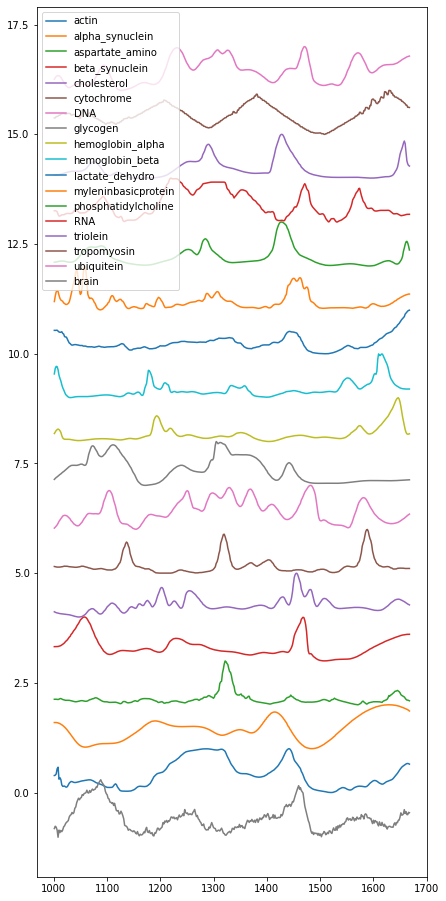

In [34]:
%matplotlib inline
plt.figure(figsize=(7,16))
for i in range(component_spectra.shape[0]):
    plt.plot(wl[57:456],component_spectra[i]+i,label=component_name[i])
plt.plot(wl[57:456],np.mean(spectra[:,57:456],axis=0)-1,label='brain')
plt.legend()
plt.show()

c:\Users\admin\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\lib\function_base.py:2691: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
c:\Users\admin\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\lib\function_base.py:2692: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


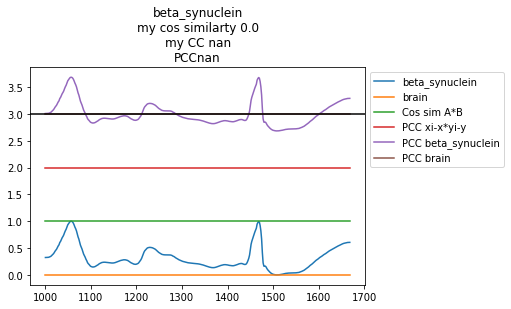

In [35]:
def visualize_pcc(wl,component_spectra,spectra,component_name):
    plt.figure()
    plt.plot(wl,component_spectra,label=component_name)
    plt.plot(wl,spectra,label='brain')
    plt.plot(wl,component_spectra*spectra+1,label='Cos sim A*B')
    plt.plot(wl,(component_spectra-np.mean(component_spectra))*
            (spectra-np.mean(spectra))+2,label='PCC xi-x*yi-y')
    plt.plot(wl,(component_spectra-np.mean(component_spectra))+3,label='PCC '+component_name)
    plt.plot(wl,(spectra-np.mean(spectra))+3,label='PCC brain')
    plt.axhline(y = 3, color = 'black', linestyle = '-') 
    plt.legend(bbox_to_anchor=(1, 1))
    plt.title(component_name+'\n'+
            'my cos similarty '+ str(cosine_similarity([component_spectra], [spectra])[0][0])+'\n'+
            'my CC '+str(np.corrcoef(component_spectra, spectra)[0,1])+'\n'+
            'PCC'+str(np.corrcoef(component_spectra, spectra)[0,1]))
    plt.show()
visualize_pcc(wl[57:456],component_spectra[3],spectra_peakextracted[2000,57:456],component_name[3])
for i in range(component_spectra.shape[0]):
    component_spectra[i]=savgol_filter(component_spectra[i]-baseline_als(component_spectra[i], lam=100, p=0.0001, niter=10),7,3)
    component_spectra[i][component_spectra[i]<np.percentile(component_spectra[i],70)]=0

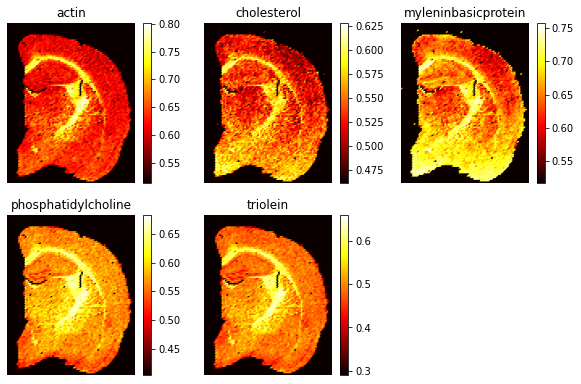

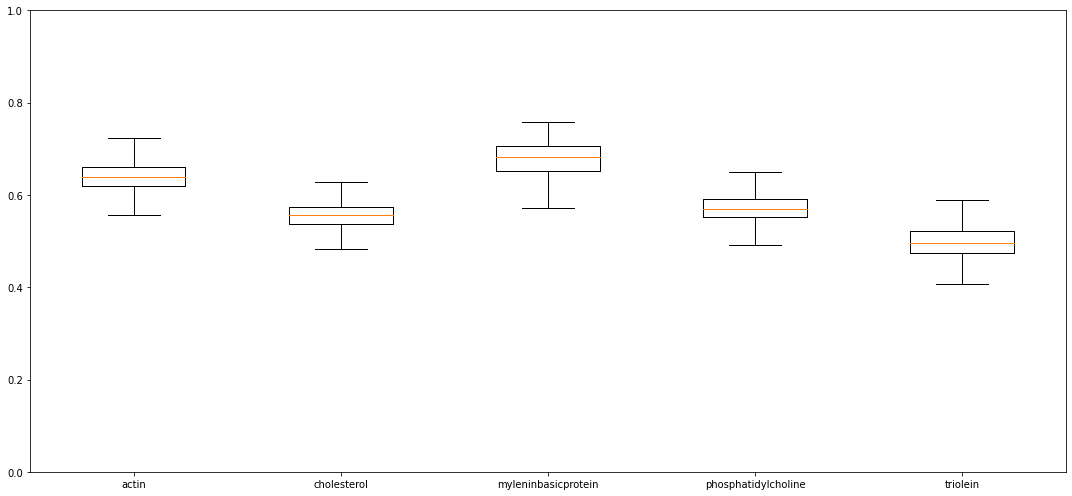

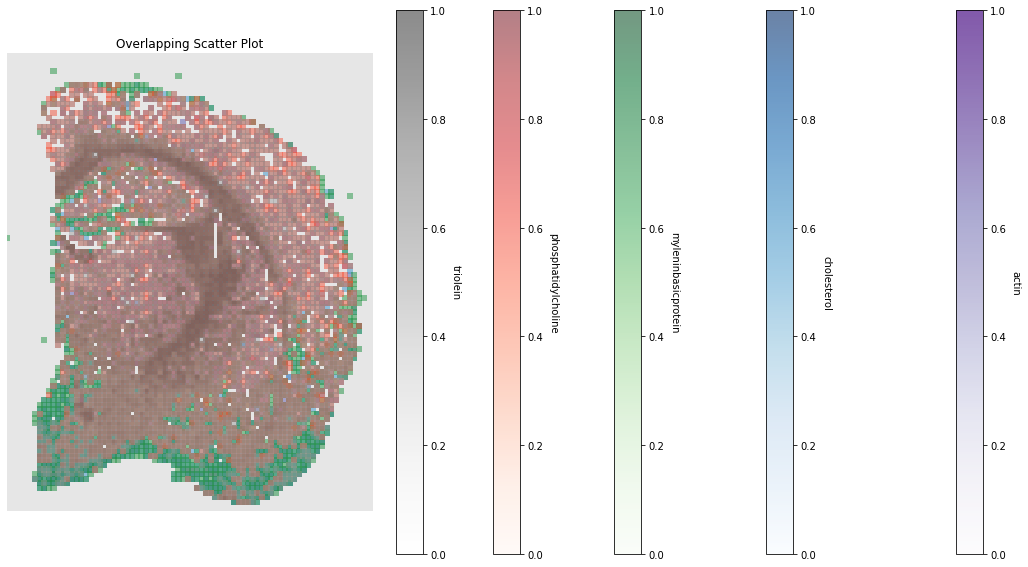

In [ ]:
%matplotlib inline
plt.figure(figsize=(10,10))
count=1
z_values = []
z_fullvalues=[]
box_label=[]
for i in [0,4,11,12,14]:
    z=np.zeros((len(spectra_peakextracted)))
    for j in range(len(spectra_peakextracted)):
        z[j]=my_corrcoef(component_spectra[i], spectra_peakextracted[j,57:456])
    z_values.append(z[spectra_peakextracted[:,0]>0])
    z_fullvalues.append(z)
    plt.subplot(3,3,count)
    count+=1
    heat=plt.scatter(df["X"],df["Y"], c=z,
                     s=5, cmap='hot',vmax=max(z[spectra_peakextracted[:,0]>0]),vmin=min(z[spectra_peakextracted[:,0]>0]))
    plt.imshow(img,extent=imgaxis)
    plt.title(component_name[i])
    box_label.append(component_name[i])
    plt.gca().invert_xaxis()
    plt.gca().invert_yaxis()
    plt.axis('off')
    plt.colorbar(heat)
plt.show()

plt.figure(figsize=(15, 7))
plt.boxplot(z_values, labels=box_label, showfliers=False)
plt.ylim(-0, 1)

plt.tight_layout()
plt.show()

color_maps = ['Purples', 'Blues', 'Greens', 'Reds',
              'Greys','Oranges'] 
mask=[np.percentile(j, 30) for j in z_values]

plt.figure(figsize=(20, 10))

for i in range(len(box_label)):
    z=z_fullvalues[i].copy()
    z[z<mask[i]]='NaN'
    heat=plt.scatter(df["X"], df["Y"], c=z, 
                     s=38, cmap=color_maps[i], vmax=1,vmin=0, 
                     alpha=0.7-0.05*(i+1), edgecolors='none', marker='s')
    cbar=plt.colorbar(heat) 
    cbar.set_label(box_label[i], rotation=270, labelpad=15)
plt.imshow(img, extent=imgaxis, alpha=0.1)
plt.title("Overlapping Scatter Plot")
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.axis('off')
plt.show()

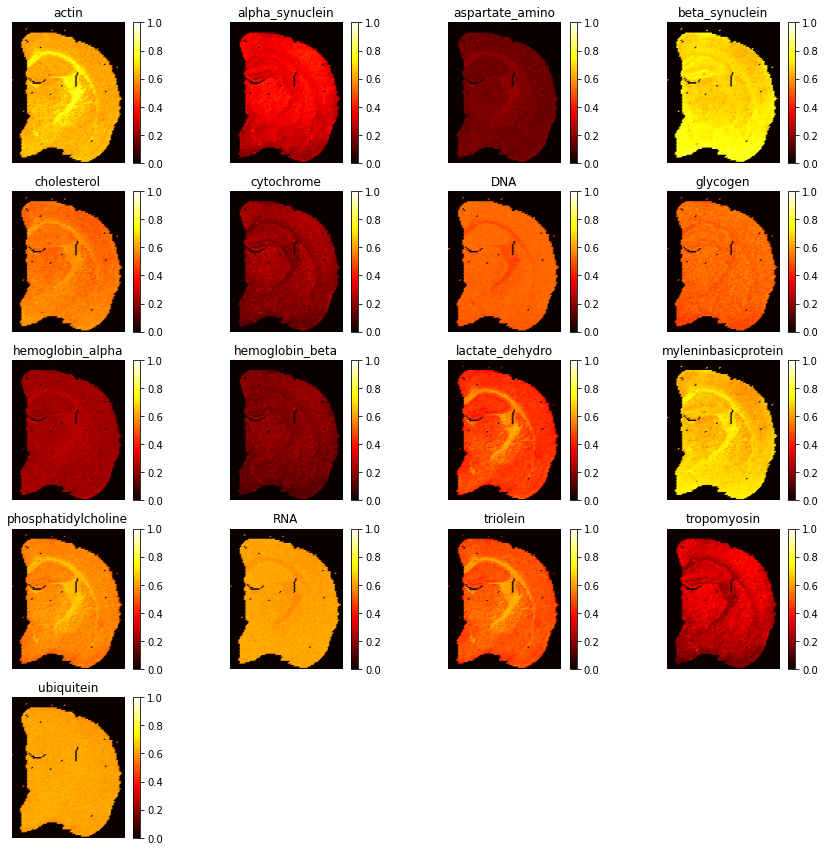

In [ ]:
%matplotlib inline
z_fullvalues=[]
plt.figure(figsize=(15,15))
for i in range(component_spectra.shape[0]):
    z=np.zeros((len(spectra_peakextracted)))
    for j in range(len(spectra_peakextracted)):
        z[j]=my_corrcoef(component_spectra[i], spectra_peakextracted[j,57:456])
    plt.subplot(5,4,i+1)
    z_fullvalues.append(z)
    heat=plt.scatter(df["X"],df["Y"], c=z,
                     s=5, cmap='hot',vmax=1,vmin=0)
    plt.imshow(img,extent=imgaxis)
    plt.title(component_name[i])
    plt.gca().invert_xaxis()
    plt.gca().invert_yaxis()
    plt.axis('off')
    plt.colorbar(heat)
plt.show()
data=pd.DataFrame({'X': df["X"], 'Y': df["Y"]})
for i, name in enumerate(component_name):
    data[name] = z_fullvalues[i]

## abeta harvard

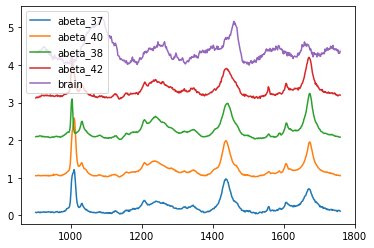

In [ ]:
component_excel=pd.read_excel('map/components_abeta_harvard.xlsx')
component_spectra=component_excel.iloc[:,1:513].to_numpy()
component_name=component_excel.iloc[:,0]

plt.figure()
for i in range(component_spectra.shape[0]):
    plt.plot(wl[1:513],component_spectra[i]+i,label=component_name[i])
plt.plot(wl[1:513],np.mean(spectra[:,1:513],axis=0)+4,label='brain')
plt.legend()
plt.show()

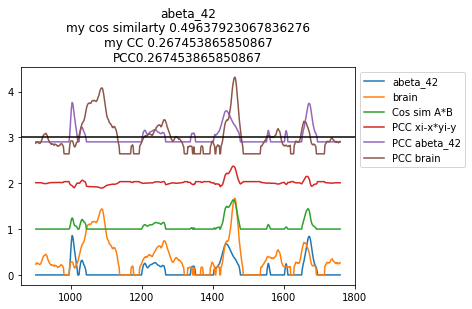

In [42]:
i=3
j=np.argmax(z>0.62)
for i in range(component_spectra.shape[0]):
    component_spectra[i]=savgol_filter(component_spectra[i]-baseline_als(component_spectra[i], lam=100, p=0.0001, niter=10),7,3)
    component_spectra[i][component_spectra[i]<np.percentile(component_spectra[i],70)]=0
visualize_pcc(wl[1:513],component_spectra[i],
              spectra_peakextracted[j,1:513],
              component_name[i])

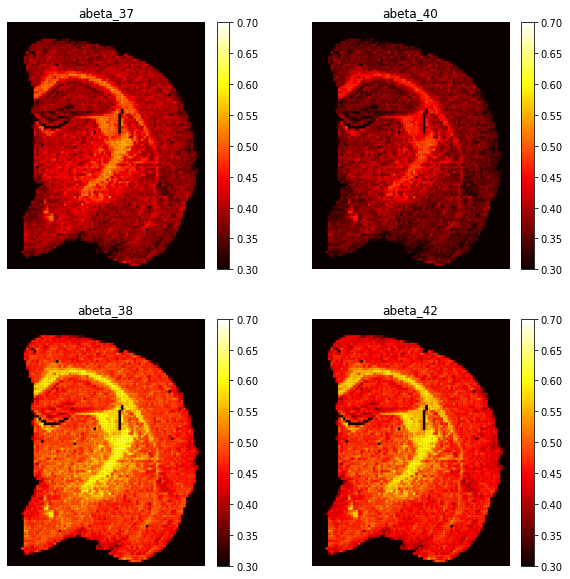

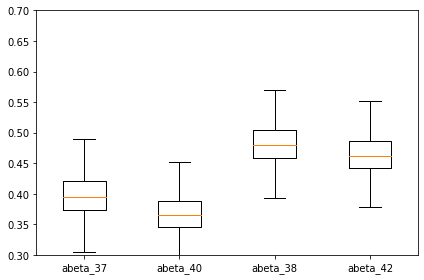

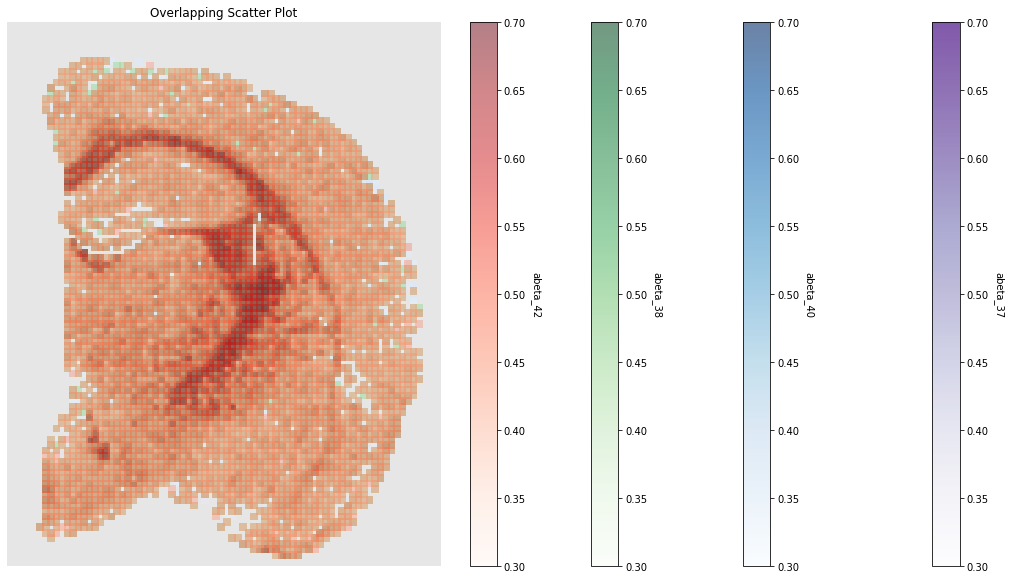

In [ ]:
%matplotlib inline
plt.figure(figsize=(10,10))
z_values = []
z_fullvalues=[]
box_label=[]
for i in range(component_spectra.shape[0]):
    z=np.zeros((len(spectra_peakextracted)))
    for j in range(len(spectra_peakextracted)):
        z[j]=my_corrcoef(component_spectra[i], spectra_peakextracted[j,1:513])
    z_values.append(z[spectra_peakextracted[:,0]>0])
    z_fullvalues.append(z)
    plt.subplot(2,2,i+1)
    heat=plt.scatter(df["X"],df["Y"], c=z,
                     s=5, cmap='hot',vmax=0.7,
                     vmin=0.3)
    micimg=plt.imshow(img,extent=imgaxis)
    plt.title(component_name[i])
    box_label.append(component_name[i])
    plt.gca().invert_xaxis()
    plt.gca().invert_yaxis()
    plt.axis('off')
    plt.colorbar(heat)
plt.show()

plt.figure()
plt.boxplot(z_values, labels=component_name, showfliers=False)
plt.ylim(0.3, 0.7)

plt.tight_layout()
plt.show()

color_maps = ['Purples', 'Blues', 'Greens', 'Reds',
              'Greys','Oranges'] 
mask=[np.percentile(j, 15) for j in z_values]

plt.figure(figsize=(20, 10))

for i in range(len(box_label)):
    z=z_fullvalues[i].copy()
    z[z<mask[i]]='NaN'
    heat=plt.scatter(df["X"], df["Y"], c=z, 
                     s=60, cmap=color_maps[i], vmax=0.7,vmin=0.3, 
                     alpha=0.7-0.05*(i+1), edgecolors='none', marker='s')
    cbar=plt.colorbar(heat) 
    cbar.set_label(box_label[i], rotation=270, labelpad=15)
plt.imshow(img, extent=imgaxis, alpha=0.1)
plt.title("Overlapping Scatter Plot")
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.axis('off')
plt.show()
data=pd.DataFrame({'X': df["X"], 'Y': df["Y"]})
for i, name in enumerate(component_name):
    data[name] = z_fullvalues[i]

# PCA

[0.91792652 0.0415596  0.0081749 ]


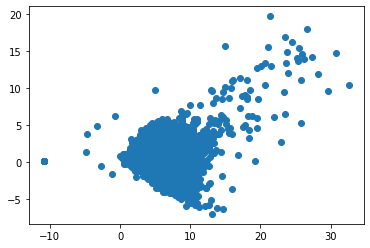

In [49]:
pca = PCA(n_components=3)
pc=pca.fit_transform(spectra)
print(pca.explained_variance_ratio_)
plt.scatter(pc[:,0], pc[:,1])

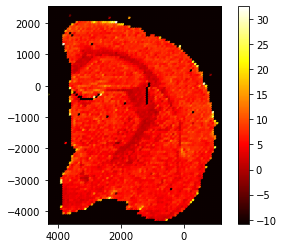

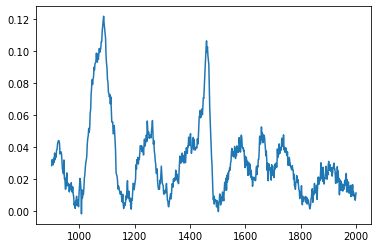

In [ ]:
%matplotlib inline
z=pc[:,0]

plt.figure()
heat=plt.scatter(df["X"],df["Y"], c=z,
                 s=5, cmap='hot')
micimg=plt.imshow(img,extent=imgaxis)
plt.colorbar(heat)
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.show()
plt.figure()
plt.plot(wl,pca.components_[0,:])
plt.show()
data = pd.DataFrame({'X': df["X"], 'Y': df["Y"], 'Z': z})
data = pd.DataFrame({'wl': wl, 'pc1': pca.components_[0,:]})

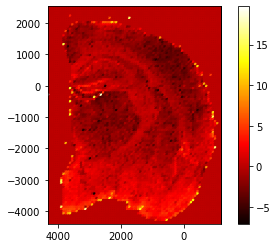

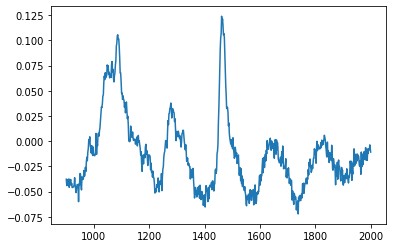

In [ ]:
%matplotlib inline
z=pc[:,1]

plt.figure()
heat=plt.scatter(df["X"],df["Y"], c=z,
                 s=5, cmap='hot')
micimg=plt.imshow(img,extent=imgaxis)
plt.colorbar(heat)
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.show()
plt.figure()
plt.plot(wl,pca.components_[1,:])
plt.show()
data = pd.DataFrame({'X': df["X"], 'Y': df["Y"], 'Z': z})
data = pd.DataFrame({'wl': wl, 'pc2': pca.components_[1,:]})

# heat map by ad class

In [57]:
feature_importance=pd.read_excel('map/feature importance.xlsx',header=None).to_numpy()
new_axis=pd.read_excel('map/map_axis.xlsx',header=None).to_numpy()

In [58]:
old_axis=feature_importance[0,1:]
reversedlabel=False
if reversedlabel:
    svm_feature=-np.interp(new_axis,old_axis,feature_importance[1,1:])
    svm_intercept=-feature_importance[1,0]
    log_feature=-np.interp(new_axis,old_axis,feature_importance[2,1:])
    log_intercept=-feature_importance[2,0]
else:
    svm_feature=np.interp(new_axis,old_axis,feature_importance[1,1:])
    svm_intercept=feature_importance[1,0]
    log_feature=np.interp(new_axis,old_axis,feature_importance[2,1:])
    log_intercept=feature_importance[2,0]

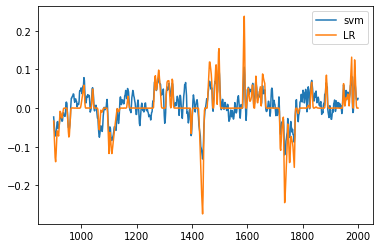

In [59]:
plt.plot(wl,svm_feature.T,label='svm')
plt.plot(wl,log_feature.T,label='LR')
plt.legend()
plt.show()

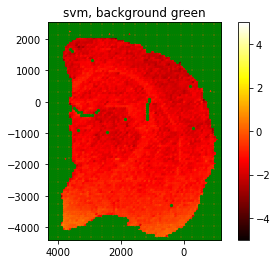

In [ ]:
z=np.matmul(spectra,svm_feature.T)+svm_intercept
scale=5
background=(z==svm_intercept)

plt.figure()
heat=plt.scatter(df["X"],df["Y"], c=z,
                 s=5, cmap='hot',vmin=-scale, vmax=+scale)
plt.scatter(df["X"].iloc[background],df["Y"].iloc[background], c='g', s=5)
micimg=plt.imshow(img,extent=imgaxis)
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.colorbar(heat)
plt.title('svm, background green')
plt.show()

data = pd.DataFrame({'X': df["X"], 'Y': df["Y"], 'Z': z[:,0]})

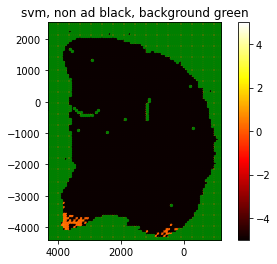

In [63]:
z=np.matmul(spectra,svm_feature.T)+svm_intercept
scale=5
background=(z==svm_intercept)
z[z<svm_intercept]=-scale
plt.figure()
heat=plt.scatter(df["X"],df["Y"], c=z,
                 s=5, cmap='hot',vmin=-scale, vmax=scale)
plt.scatter(df["X"].iloc[background],df["Y"].iloc[background], c='g', s=5)
micimg=plt.imshow(img,extent=imgaxis)
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.colorbar(heat)
plt.title('svm, non ad black, background green')
plt.show()

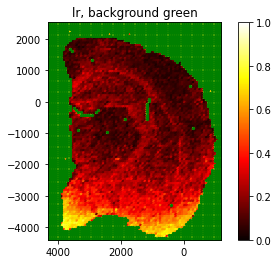

In [65]:
z=1/(1+np.exp(-(np.matmul(spectra,log_feature.T)+log_intercept)))
background=(z==1/(1+np.exp(-(log_intercept))))
plt.figure()
heat=plt.scatter(df["X"],df["Y"], c=z,
                 s=5, cmap='hot',vmin=0, vmax=1)
plt.scatter(df["X"].iloc[background],df["Y"].iloc[background], c='g', s=5)
micimg=plt.imshow(img,extent=imgaxis)
plt.colorbar(heat)
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.title('lr, background green')
plt.show()

data = pd.DataFrame({'X': df["X"], 'Y': df["Y"], 'Z': z[:,0]})

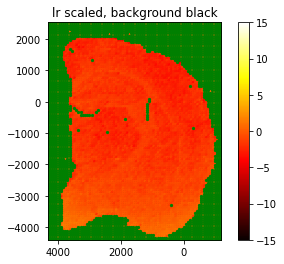

In [67]:
z=np.matmul(spectra,log_feature.T)+log_intercept
scale=15
background=z==log_intercept
plt.figure()
heat=plt.scatter(df["X"],df["Y"], c=z,
                 s=5, cmap='hot',vmin=-scale, vmax=+scale)
plt.scatter(df["X"].iloc[background],df["Y"].iloc[background], c='g', s=5)
micimg=plt.imshow(img,extent=imgaxis)
plt.colorbar(heat)
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.title('lr scaled, background black')
plt.show()

data = pd.DataFrame({'X': df["X"], 'Y': df["Y"], 'Z': z[:,0]})

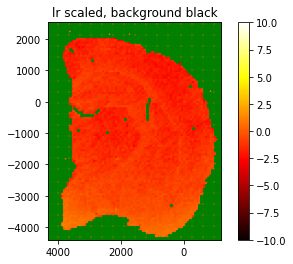

In [69]:
w_norm =np.linalg.norm(log_feature.T)
y=np.matmul(spectra,log_feature.T)+log_intercept
z=y/w_norm
scale=10
background=z==log_intercept/w_norm
plt.figure()
heat=plt.scatter(df["X"],df["Y"], c=z,
                 s=5, cmap='hot',vmin=-scale, vmax=+scale)
plt.scatter(df["X"].iloc[background],df["Y"].iloc[background], c='g', s=5)
micimg=plt.imshow(img,extent=imgaxis)
plt.colorbar(heat)
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.title('lr scaled, background black')
plt.show()

data = pd.DataFrame({'X': df["X"], 'Y': df["Y"], 'Z': z[:,0]})